In [3]:
import pandas as pd

obesity_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


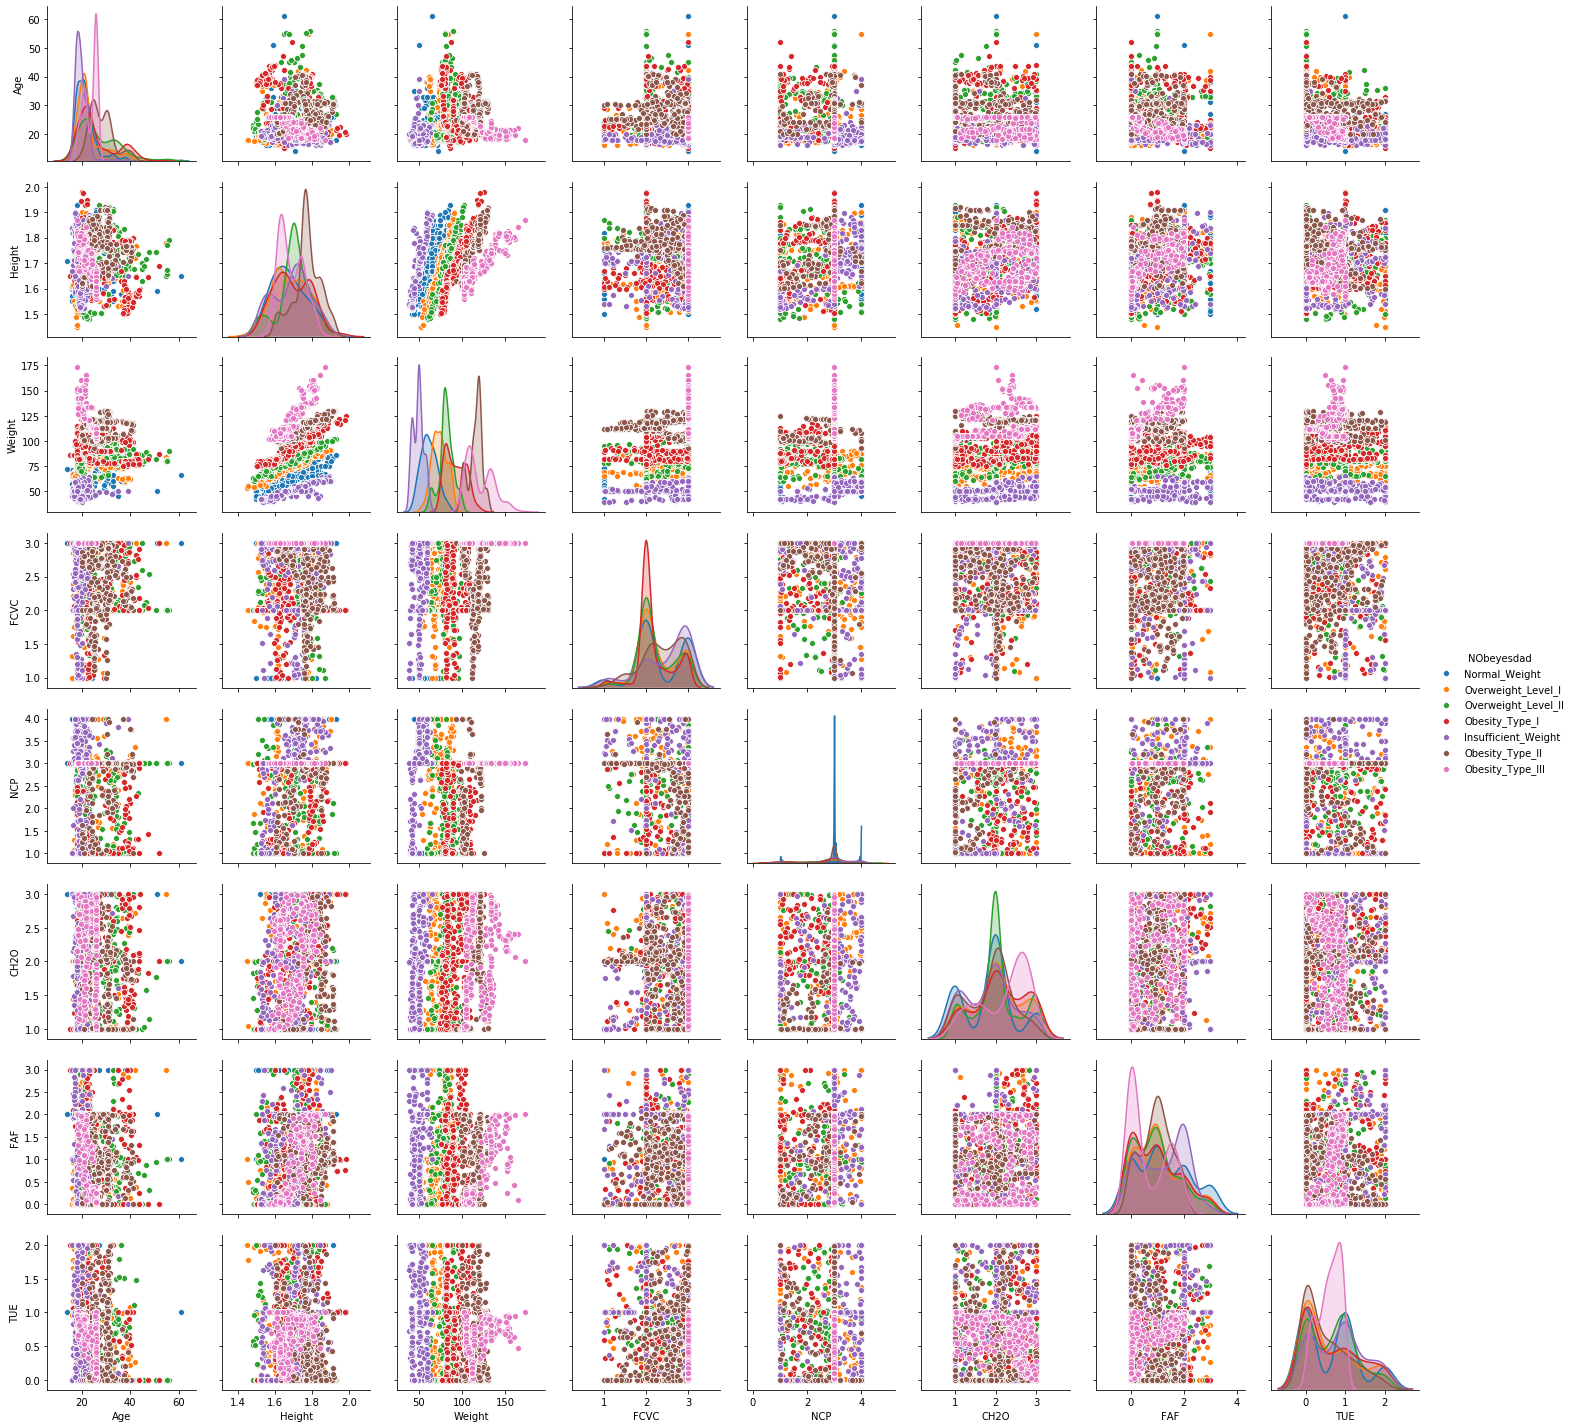

In [5]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# We have to temporarily drop the rows with 'NA' values # because the Seaborn plotting 
# function does not know what to do with them
sb.pairplot(obesity_data, hue='NObeyesdad')

In [6]:
obesity_data['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [7]:
obesity_data['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [8]:
obesity_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

enc.fit(obesity_data['Gender'])
obesity_data['Gender'] = enc.transform(obesity_data['Gender'])

In [10]:
obesity_data['Gender'].unique()

array([0, 1], dtype=int64)

In [11]:
enc.fit(obesity_data['MTRANS'])
obesity_data['MTRANS'] = enc.transform(obesity_data['MTRANS'])

In [12]:
obesity_data['MTRANS'].unique()

array([3, 4, 0, 2, 1], dtype=int64)

In [13]:
enc.fit(obesity_data['family_history_with_overweight'])
obesity_data['family_history_with_overweight'] = enc.transform(obesity_data['family_history_with_overweight'])

enc.fit(obesity_data['FAVC'])
obesity_data['FAVC'] = enc.transform(obesity_data['FAVC'])

enc.fit(obesity_data['SMOKE'])
obesity_data['SMOKE'] = enc.transform(obesity_data['SMOKE'])

enc.fit(obesity_data['CAEC'])
obesity_data['CAEC'] = enc.transform(obesity_data['CAEC'])

enc.fit(obesity_data['SCC'])
obesity_data['SCC'] = enc.transform(obesity_data['SCC'])

enc.fit(obesity_data['CALC'])
obesity_data['CALC'] = enc.transform(obesity_data['CALC'])

In [14]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II


C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Eduardo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


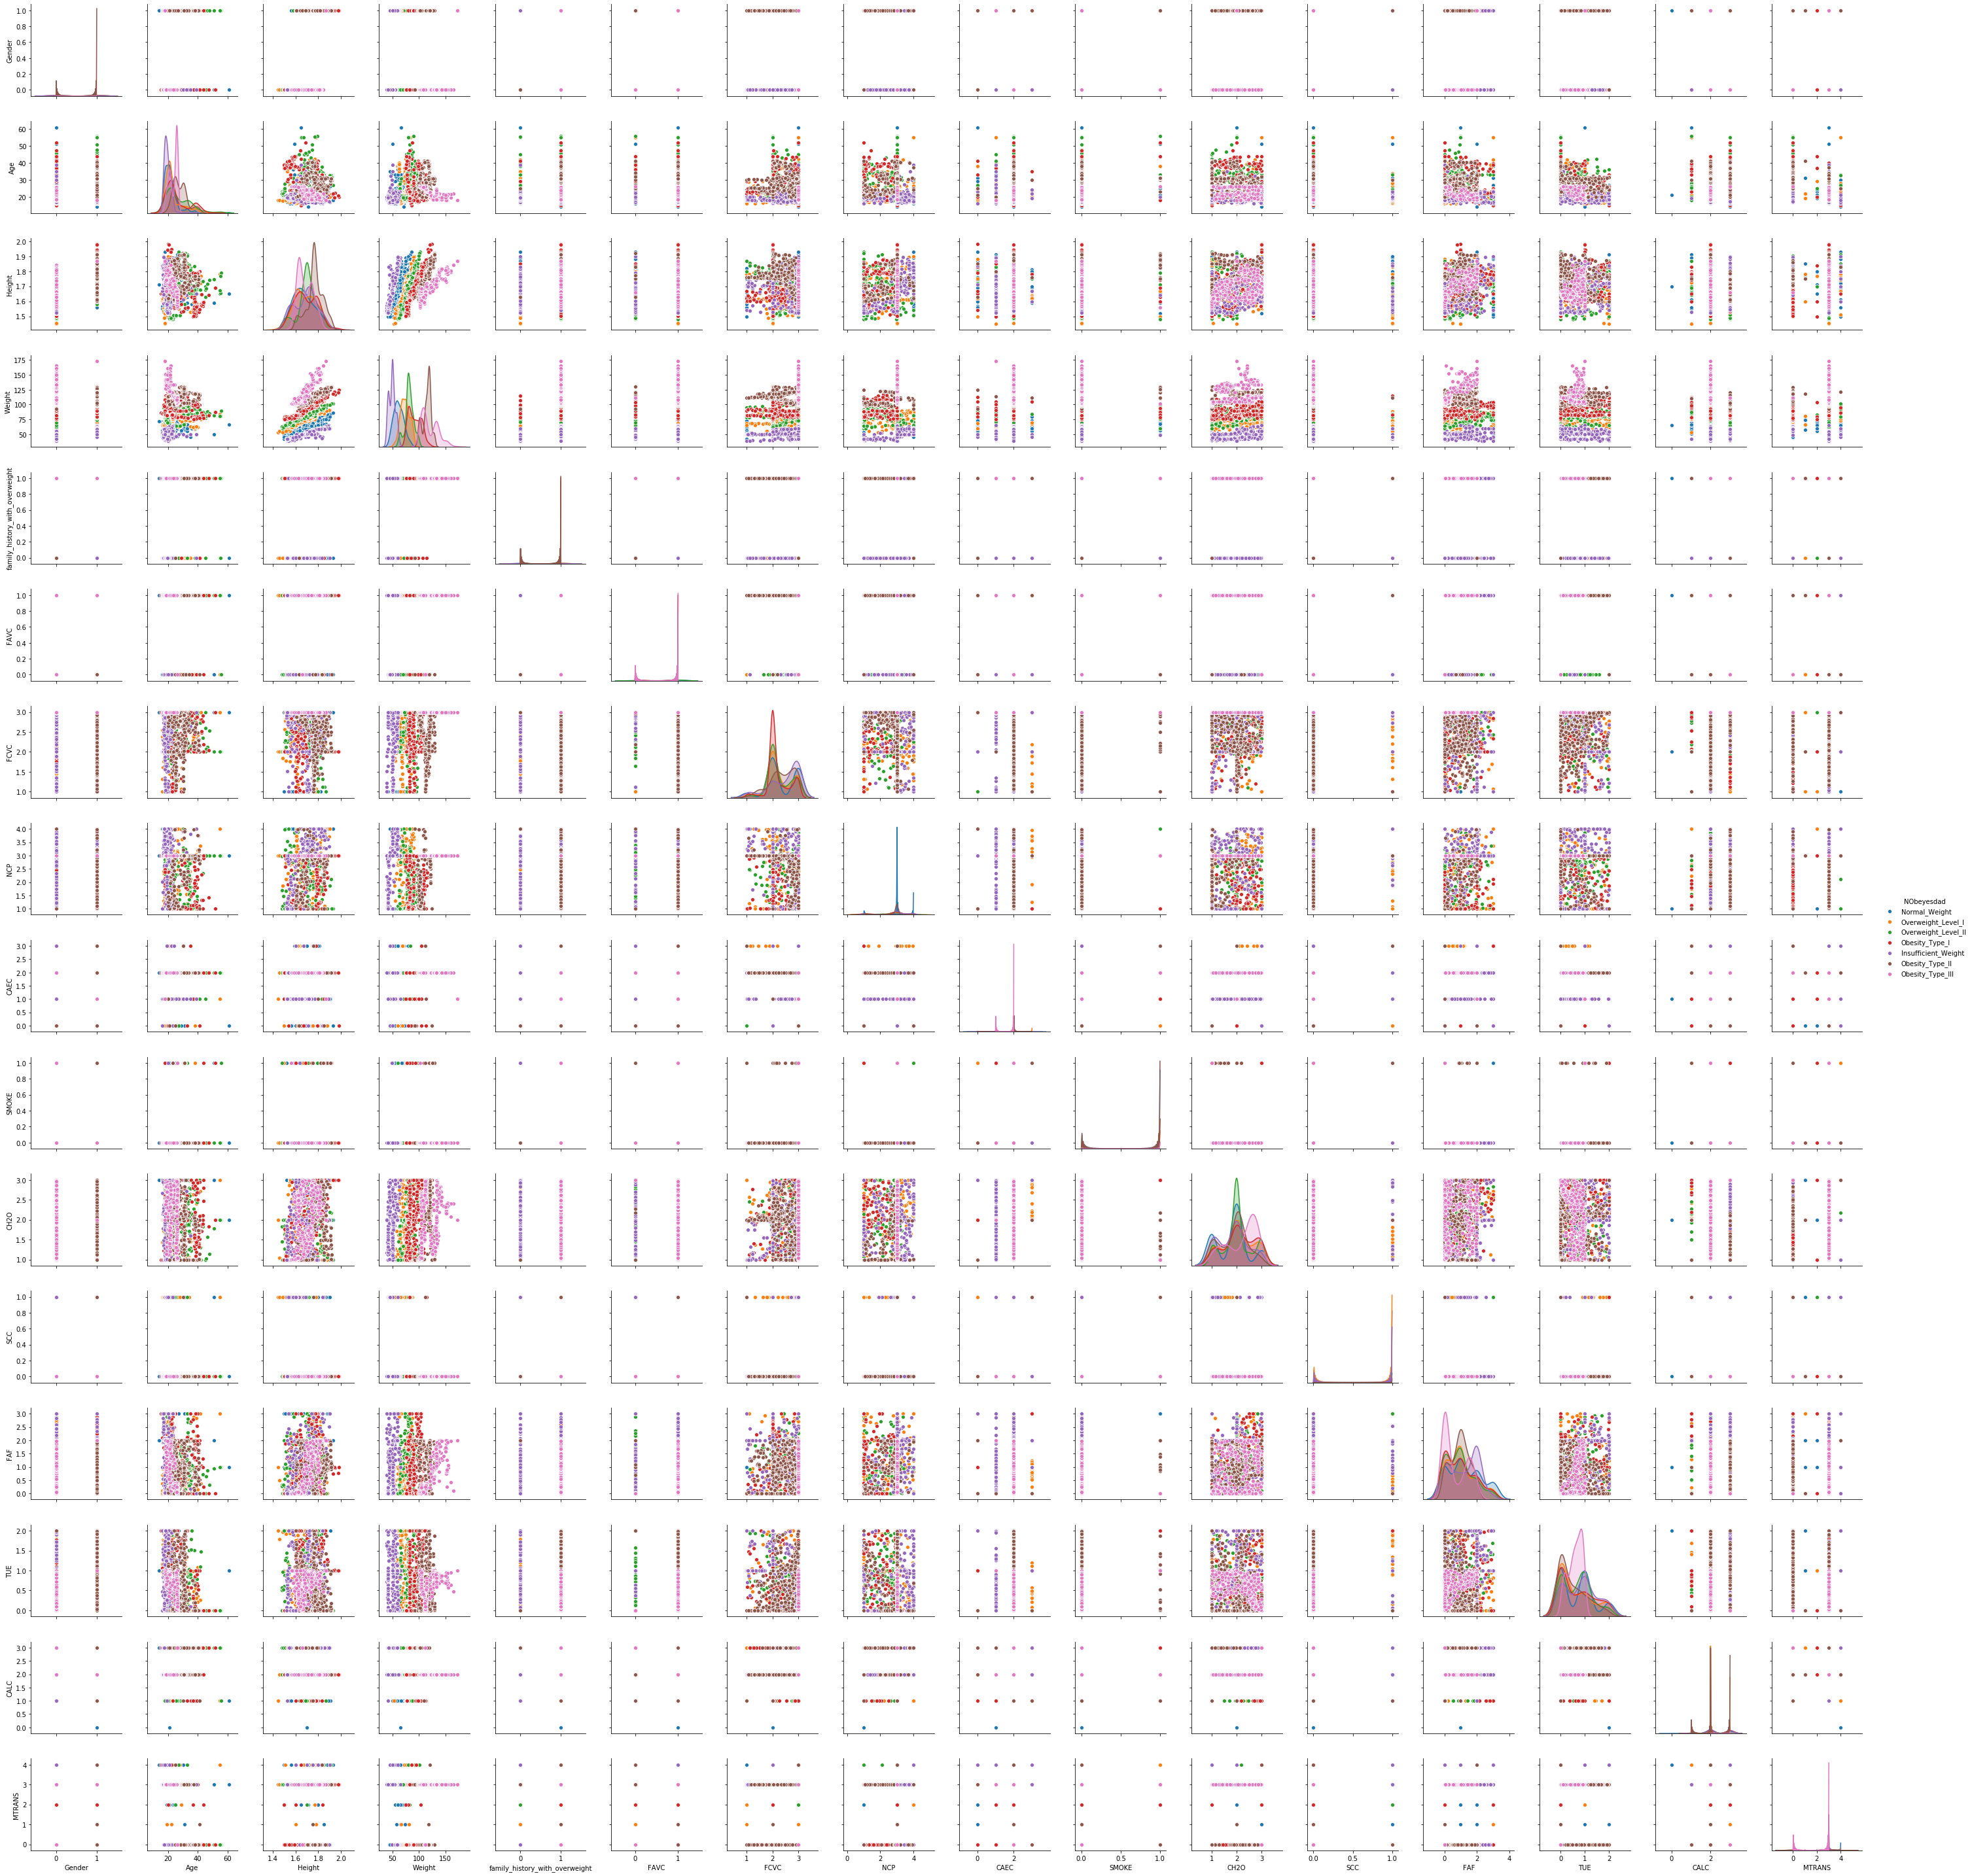

In [17]:
sb.pairplot(obesity_data, hue='NObeyesdad')

In [17]:
all_inputs = obesity_data[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']].values

# Similarly, we can extract the class labels
all_labels = obesity_data['NObeyesdad'].values

In [18]:
all_inputs[:17]

array([[  0.  ,  21.  ,   1.62,  64.  ,   1.  ,   0.  ,   2.  ,   3.  ,
          2.  ,   0.  ,   2.  ,   0.  ,   0.  ,   1.  ,   3.  ,   3.  ],
       [  0.  ,  21.  ,   1.52,  56.  ,   1.  ,   0.  ,   3.  ,   3.  ,
          2.  ,   1.  ,   3.  ,   1.  ,   3.  ,   0.  ,   2.  ,   3.  ],
       [  1.  ,  23.  ,   1.8 ,  77.  ,   1.  ,   0.  ,   2.  ,   3.  ,
          2.  ,   0.  ,   2.  ,   0.  ,   2.  ,   1.  ,   1.  ,   3.  ],
       [  1.  ,  27.  ,   1.8 ,  87.  ,   0.  ,   0.  ,   3.  ,   3.  ,
          2.  ,   0.  ,   2.  ,   0.  ,   2.  ,   0.  ,   1.  ,   4.  ],
       [  1.  ,  22.  ,   1.78,  89.8 ,   0.  ,   0.  ,   2.  ,   1.  ,
          2.  ,   0.  ,   2.  ,   0.  ,   0.  ,   0.  ,   2.  ,   3.  ],
       [  1.  ,  29.  ,   1.62,  53.  ,   0.  ,   1.  ,   2.  ,   3.  ,
          2.  ,   0.  ,   2.  ,   0.  ,   0.  ,   0.  ,   2.  ,   0.  ],
       [  0.  ,  23.  ,   1.5 ,  55.  ,   1.  ,   1.  ,   3.  ,   3.  ,
          2.  ,   0.  ,   2.  ,   0.  ,   1.  ,   0.  ,   

In [19]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create the classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training set
clf.fit(training_inputs,training_classes)

# Validate the classifier on the testing set using classification accuracy
y_pred = clf.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=clf.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9261363636363636


Text(0.5, 1.0, 'Average score: 0.9336235709068682')

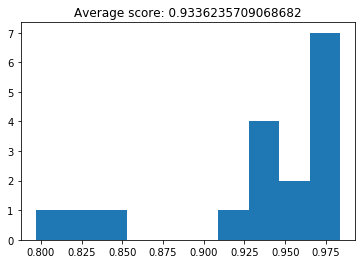

In [21]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=17)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [22]:
from sklearn.metrics import confusion_matrix

y_true = testing_classes
confusion_matrix(y_true, y_pred)

array([[75,  4,  0,  0,  0,  0,  0],
       [ 4, 52,  0,  0,  0,  1,  0],
       [ 0,  0, 94,  3,  0,  0,  2],
       [ 0,  0,  2, 68,  0,  0,  0],
       [ 0,  0,  0,  0, 77,  0,  0],
       [ 0,  7,  0,  0,  0, 67,  3],
       [ 0,  0,  5,  0,  0,  0, 64]], dtype=int64)

Train data accuracy: 0.936197094125079
Test data accuracy: 0.8958333333333334


Text(0.5, 1.0, 'Average score: 0.8862191925886193')

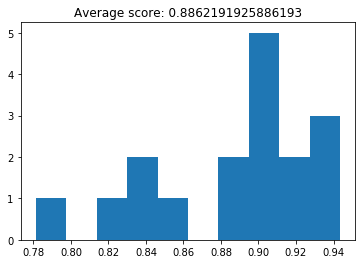

In [25]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training set
neigh.fit(training_inputs,training_classes)


# Validate the classifier on the testing set using classification accuracy
y_pred = neigh.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=neigh.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(neigh, all_inputs, all_labels, cv=17)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [26]:
y_true = testing_classes
confusion_matrix(y_true, y_pred)

array([[77,  2,  0,  0,  0,  0,  0],
       [16, 27,  2,  0,  0,  8,  4],
       [ 0,  0, 93,  2,  0,  0,  4],
       [ 0,  0,  2, 67,  1,  0,  0],
       [ 0,  0,  0,  0, 77,  0,  0],
       [ 0,  4,  1,  0,  0, 69,  3],
       [ 0,  1,  4,  0,  0,  1, 63]], dtype=int64)

Train data accuracy: 0.15919140871762477
Test data accuracy: 0.1875


Text(0.5, 1.0, 'Average score: 0.16627227950293638')

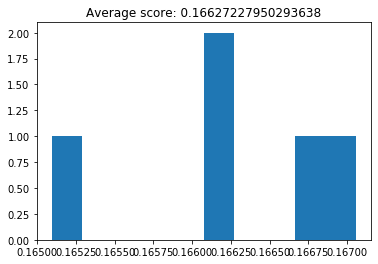

In [27]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(training_inputs,training_classes)

# Validate the classifier on the testing set using classification accuracy
y_pred = clf.predict(testing_inputs)
print("Train data accuracy:",accuracy_score(y_true = training_classes, y_pred=clf.predict(training_inputs)))
print("Test data accuracy:",accuracy_score(y_true = testing_classes, y_pred=y_pred))

cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=5)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [57]:
from sklearn.model_selection import GridSearchCV


decision_tree_classifier = DecisionTreeClassifier(max_depth=1, max_features=1)

parameter_grid = {'max_depth': [1, 40],
                  'max_features': [1, 16]}

grid_search = GridSearchCV(decision_tree_classifier, parameter_grid)

grid_search.fit(all_inputs, all_labels)

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9208905731880626
Best parameters: {'max_depth': 40, 'max_features': 16}


C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
